In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.ticker

In [3]:
df = pd.read_csv('superstore_data.csv', encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [4]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

## Top 10 products with the highest sales

In [5]:
Product_sales = df.groupby('Product Name').agg({'Sales':'sum'}).sort_values('Sales', ascending=False)[:10]
Product_sales

,Sales
Product Name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


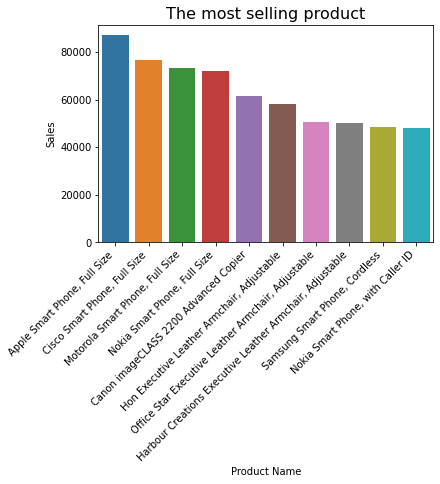

In [6]:
sns.barplot(x = 'Product Name', y = 'Sales', data = Product_sales.reset_index())
plt.xticks(rotation = 45, ha='right')
plt.title("The most selling product", fontsize=16)
plt.show()

## Top 10 most profitable products

In [7]:
Product_profit = df.groupby('Product Name').agg({'Profit':'sum'}).sort_values('Profit', ascending=False)[:10]
Product_profit

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
"Cisco Smart Phone, Full Size",17238.5206
"Motorola Smart Phone, Full Size",17027.1130
"Hoover Stove, Red",11807.9690
"Sauder Classic Bookcase, Traditional",10672.0730
"Harbour Creations Executive Leather Armchair, Adjustable",10427.3260
"Nokia Smart Phone, Full Size",9938.1955
"Cisco Smart Phone, with Caller ID",9786.6408
"Nokia Smart Phone, with Caller ID",9465.3257


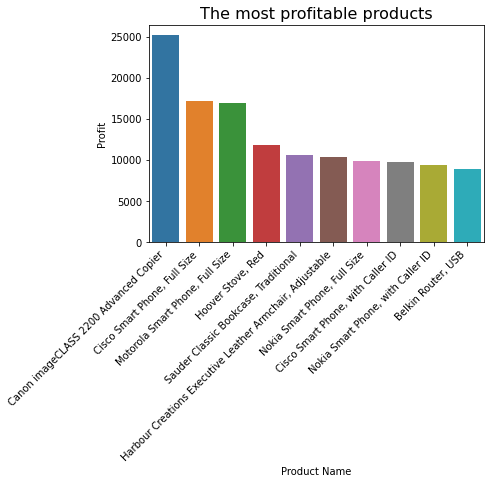

In [8]:
sns.barplot(x = 'Product Name', y = 'Profit', data = Product_profit.reset_index())
plt.xticks(rotation = 45, ha='right')
plt.title("The most profitable products", fontsize=16)
plt.show()

## Sales of each product categories

In [9]:
Cate_sales = df.groupby('Category').agg({'Sales':'sum'})
print(Cate_sales.sort_values('Sales', ascending=False))

                        Sales
Category                     
Technology       4.744557e+06
Furniture        4.110874e+06
Office Supplies  3.787070e+06


Text(0.5, 1.0, 'Sales of product categories')

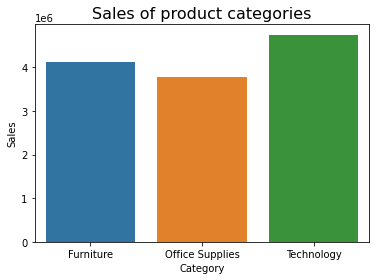

In [10]:
sns.barplot(x='Category', y='Sales', data=Cate_sales.reset_index())
plt.title('Sales of product categories', fontsize=16)

In [11]:
#Sales of each sub-category	

SubCate_sales = df.groupby(['Category', 'Sub-Category']).agg({'Sales':'sum'})
SubCate_sales

Sales
Category        Sub-Category              
Furniture       Bookcases     1.466572e+06
                Chairs        1.501682e+06
                Furnishings   3.855783e+05
                Tables        7.570419e+05
Office Supplies Appliances    1.011064e+06
                Art           3.720920e+05
                Binders       4.619115e+05
                Envelopes     1.709043e+05
                Fasteners     8.324232e+04
                Labels        7.340403e+04
                Paper         2.442917e+05
                Storage       1.127086e+06
                Supplies      2.430742e+05
Technology      Accessories   7.492370e+05
                Copiers       1.509436e+06
                Machines      7.790601e+05
                Phones        1.706824e+06

<AxesSubplot:title={'center':'Technology'}, ylabel='Sales'>

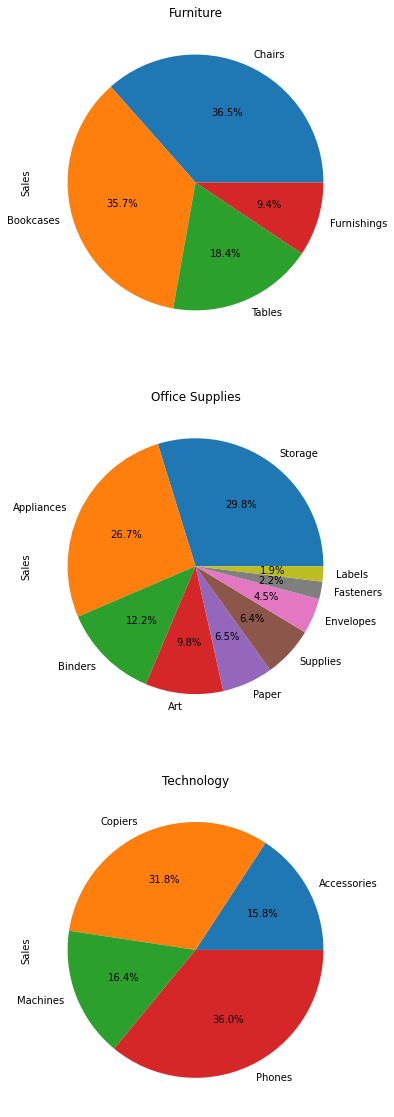

In [12]:
fig, axarr = plt.subplots(3, 1)

#Furniture
sub1 = SubCate_sales.xs('Furniture').sort_values('Sales', ascending=False)
sub1['Sales'].plot.pie(ax=axarr[0], autopct='%1.1f%%', figsize=(40,20), title='Furniture')

#Office Supplies
sub2 = SubCate_sales.xs('Office Supplies').sort_values('Sales', ascending=False)
sub2['Sales'].plot.pie(ax=axarr[1], autopct='%1.1f%%', figsize=(40,20), title='Office Supplies')

#Technology
sub3 = SubCate_sales.xs('Technology')
sub3['Sales'].plot.pie(ax=axarr[2], autopct='%1.1f%%', figsize=(40,20), title='Technology')


## Profit of each product categories

In [13]:
Cate_profit = df.groupby('Category').agg({'Profit':'sum'})
print(Cate_profit.sort_values('Profit', ascending=False))

                       Profit
Category                     
Technology       663778.73318
Office Supplies  518473.83430
Furniture        285204.72380


In [14]:
#Create table gross margin of product categories
gross_margin = Cate_profit.reset_index()
gross_margin['Sales'] = Cate_sales.values
gross_margin['Gross Margin'] = gross_margin['Profit'] / gross_margin['Sales'] * 100
gross_margin[['Profit', 'Sales']] = gross_margin[['Profit', 'Sales']].astype(int)
gross_margin

,Category,Profit,Sales,Gross Margin
0,Furniture,285204,4110874,6.937812
1,Office Supplies,518473,3787070,13.690632
2,Technology,663778,4744557,13.990319


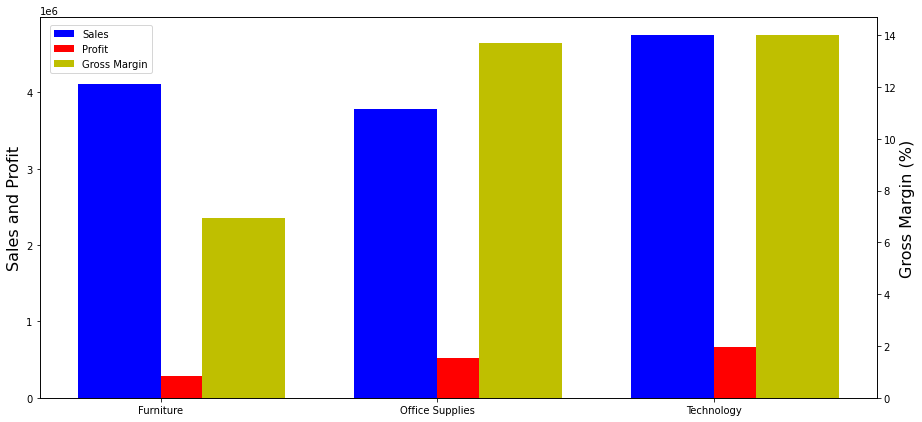

In [15]:
fig, ax = plt.subplots(figsize=(15,7))

x_axis = np.arange(len(gross_margin['Category']))

ax.bar(x_axis - 0.15, gross_margin['Sales'], 0.3, label = 'Sales', color='blue')
ax.bar(x_axis + 0.15, gross_margin['Profit'], 0.3, label = 'Profit', color='r')

ax.set_xticks(x_axis, gross_margin['Category'])
ax.set_ylabel('Sales and Profit', fontsize=16)

ax1 = ax.twinx()

ax1.bar(x_axis + 0.3, gross_margin['Gross Margin'], 0.3, label='Gross Margin', color='y')
ax1.set_xticks(x_axis, gross_margin['Category'])
ax1.set_ylabel('Gross Margin (%)', fontsize=16)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='lower left', bbox_to_anchor=(0.13, 0.76))

plt.show()

## Average shipping price for each category

In [16]:
avg_ship = df.groupby('Category').agg({'Shipping Cost':'mean'})
avg_ship

,Shipping Cost
Category,
Furniture,44.584919
Office Supplies,12.964899
Technology,49.999876


## Total discount for each category

In [17]:
sum_discount = df.groupby('Category').agg({'Discount':'sum'})
sum_discount

,Discount
Category,
Furniture,1660.030
Office Supplies,4297.190
Technology,1372.508


## Total discount for each year

In [33]:
sum_dy = df.groupby('Year').agg({'Discount':'sum'})
sum_dy

,Discount
Year,
2011,1333.394
2012,1548.774
2013,1935.522
2014,2512.038


## The most profitable customer segment

In [18]:
profit_cs = df.groupby('Segment').agg({'Profit':'sum'}).sort_values('Profit', ascending=False)
profit_cs

,Profit
Segment,
Consumer,749239.78206
Corporate,441208.32866
Home Office,277009.18056


Text(0.5, 1.0, 'Profit of customer segment')

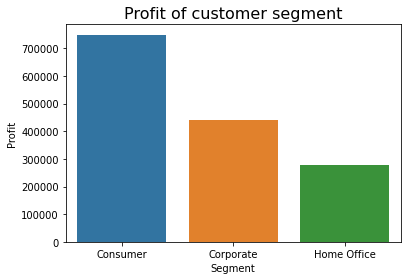

In [19]:
sns.barplot(x='Segment', y='Profit', data=profit_cs.reset_index())
plt.title('Profit of customer segment', fontsize=16)

## The most profitable customer

In [20]:
profit_custom = df.groupby('Customer ID').agg({'Customer Name':'first', 'Segment':'first', 'Profit':'sum'}).sort_values('Profit', ascending=False)[:10]
profit_custom

,Customer Name,Segment,Profit
Customer ID,,,
TC-20980,Tamara Chand,Corporate,8787.47490
RB-19360,Raymond Buch,Consumer,8523.95150
SC-20095,Sanjit Chand,Consumer,8106.21790
BE-11335,Bill Eplett,Home Office,7790.69630
HL-15040,Hunter Lopez,Consumer,7657.50178
AB-10105,Adrian Barton,Consumer,6912.61450
SP-20920,Susan Pistek,Consumer,6649.62626
HM-14860,Harry Marie,Corporate,6544.88640
TA-21385,Tom Ashbrook,Home Office,6274.98910


## Sales in countries

In [21]:
highest = df.groupby('Country').agg({'Sales':'sum'}).sort_values('Sales', ascending=False)[:10].reset_index()
lowest = df.groupby('Country').agg({'Sales':'sum'}).sort_values('Sales')[:10].sort_values('Sales',ascending=False).reset_index()

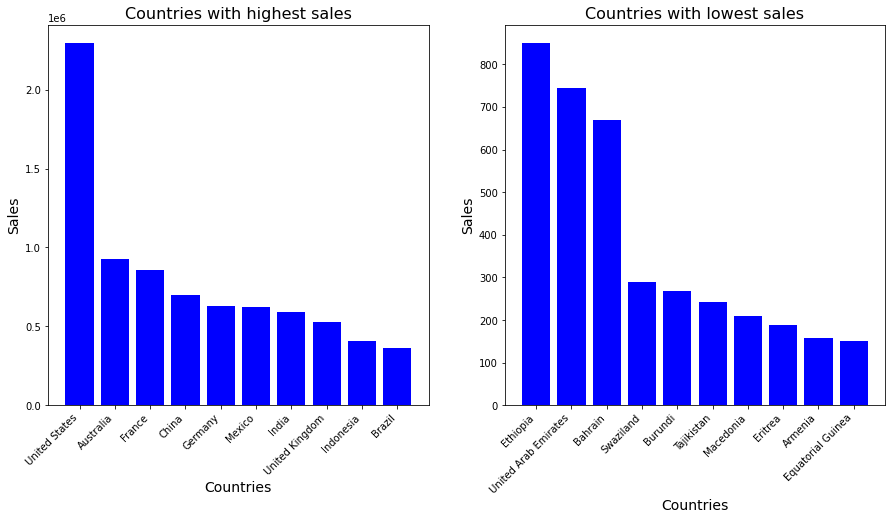

In [22]:
plt.figure(figsize=(15,7))

plt.subplot(121)
plt.bar(highest['Country'], highest['Sales'], color='blue', width=0.8)
plt.xlabel("Countries", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.title("Countries with highest sales", fontsize=16)
plt.xticks(rotation = 45, ha='right')

plt.subplot(122)
plt.bar(lowest['Country'], lowest['Sales'], color='blue', width=0.8)
plt.xlabel("Countries", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.title("Countries with lowest sales", fontsize=16)
plt.xticks(rotation = 45, ha='right')

plt.show()

## Shipping mode is the most chosen by customers

In [23]:
ship_mode = df.groupby('Ship Mode').agg({'Customer ID': 'count'})
print(ship_mode.sort_values('Customer ID', ascending=False))

                Customer ID
Ship Mode                  
Standard Class        30775
Second Class          10309
First Class            7505
Same Day               2701


<AxesSubplot:xlabel='Ship Mode', ylabel='Customer ID'>

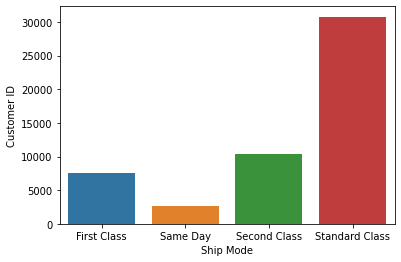

In [24]:
sns.barplot(x='Ship Mode', y='Customer ID', data=ship_mode.reset_index())

## Average shipping price for each shipping mode

In [25]:
ship_price = df.groupby('Ship Mode').agg({'Shipping Cost':'mean'})
ship_price

,Shipping Cost
Ship Mode,
First Class,41.053065
Same Day,42.937453
Second Class,30.469747
Standard Class,19.971755


## Compare the price and number of customers with each shipping mode

<AxesSubplot:xlabel='Ship Mode'>

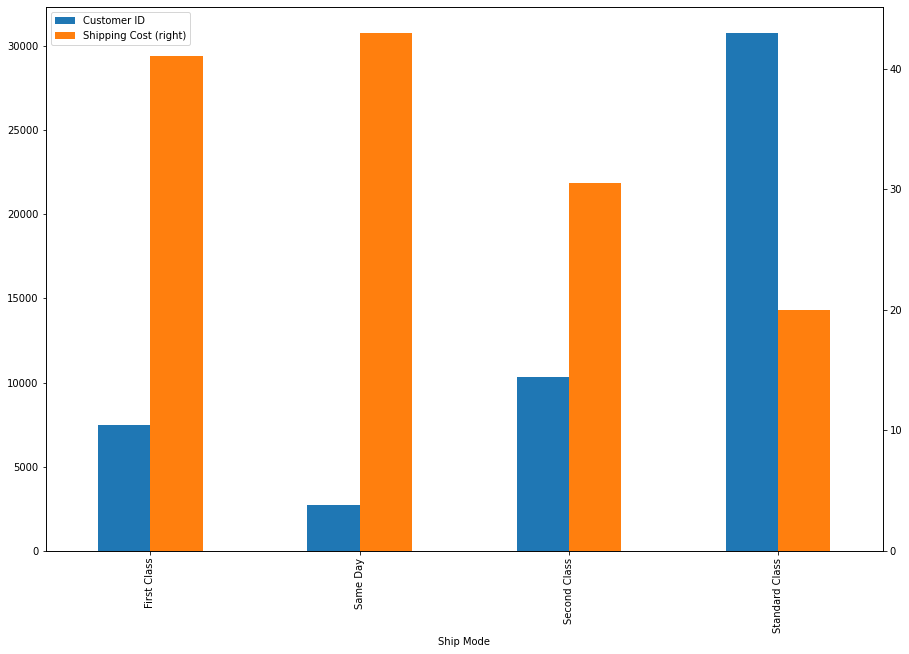

In [26]:
#add column 'Shipping Cost' to table 'ship_mode'
ship_mode['Shipping Cost'] = ship_price['Shipping Cost']

ship_mode.plot(kind='bar', secondary_y='Shipping Cost', figsize=(15,10))

## Total sales and profit by year

In [27]:
#Create new columns 'Month' and 'Year'

df['Month'] = pd.to_datetime(df['Order Date']).dt.month
df['Year'] = pd.to_datetime(df['Order Date']).dt.year

In [28]:
#Total sales by year

sales_year = df.groupby('Year').agg({'Sales':'sum'})
print(sales_year.sort_values('Sales', ascending=False))

             Sales
Year              
2014  4.299866e+06
2013  3.405746e+06
2012  2.677439e+06
2011  2.259451e+06


In [29]:
#Total profit by year

profit_year = df.groupby('Year').agg({'Profit':'sum'})
print(profit_year.sort_values('Profit', ascending=False))

            Profit
Year              
2014  504165.97046
2013  406935.23018
2012  307415.27910
2011  248940.81154


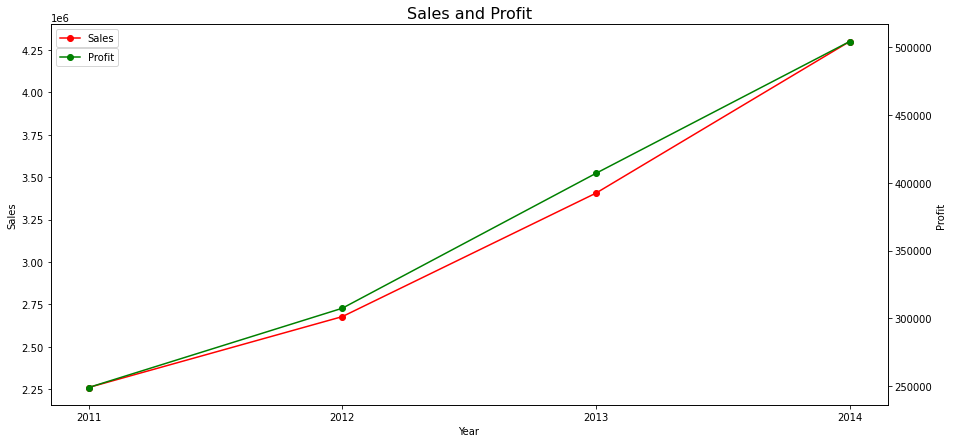

In [30]:
#Sales and profit index by year

sales_year = sales_year.reset_index()

fig, ax = plt.subplots(figsize=(15,7))

ax.plot(sales_year['Year'], sales_year['Sales'], color='r', marker="o", label='Sales')
ax.set_xlabel('Year')
ax.set_ylabel('Sales')
ax.legend(loc="upper left")

ax2 = ax.twinx()
ax2.plot(sales_year['Year'], profit_year['Profit'], color='g', marker="o", label='Profit')
ax2.set_ylabel('Profit')
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.95))

locator = matplotlib.ticker.MultipleLocator(1)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)


plt.title("Sales and Profit", fontsize=16)

plt.show()

## Total sales by month

In [31]:
sales_month = df.groupby(['Year', 'Month']).agg({'Sales':'sum'})
sales_month

Sales
Year Month              
2011 1      138241.30042
     2      134969.94086
     3      171455.59372
     4      128833.47034
     5      148146.72092
     6      189338.43966
     7      162034.69756
     8      219223.49524
     9      255237.89698
     10     204675.07846
     11     214934.29386
     12     292359.96752
2012 1      162800.89338
     2      152661.15144
     3      201608.72784
     4      187469.96192
     5      218960.16042
     6      249289.77172
     7      174394.02808
     8      271669.66086
     9      256567.85308
     10     239321.09904
     11     270723.05356
     12     291972.33306
2013 1      206459.19582
     2      191062.77216
     3      230547.79468
     4      233181.34844
     5      304509.96336
     6      341162.34370
     7      223642.65664
     8      323876.60716
     9      326897.27044
     10     270121.87570
     11     383039.21248
     12     371245.40880
2014 1      268265.52240
     2      244159.30486
     3      347720.96868
     4      302132.54000
     5      304798.83604
     6      372577.23298
     7      278672.17326
     8      432731.04194
     9      405436.70584
     10     406659.41500
     11     508954.73156
     12     427757.39800

<AxesSubplot:xlabel='Month', ylabel='Sales'>

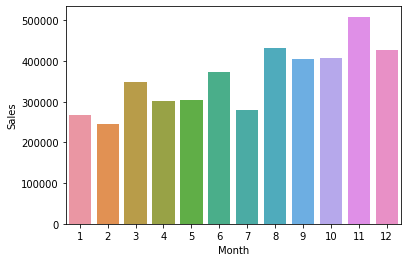

In [32]:
#Total sales by month in 2014

sales2014 = sales_month.xs(2014)
sns.barplot(x='Month', y='Sales', data=sales2014.reset_index())